In [19]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_26/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<Figure size 432x288 with 0 Axes>

<img src="../../../common/logo_DH.png" align='left' width=50%/>

# Introducción a Clasificación - KNN

## Tabla de Contenidos
1. <a href='#section_intro'>Introducción</a>
2. <a href='#section_knn'>KNN</a>
3. <a href='#section_distances'>Medidas de distancia</a>
4. <a href="#section_resumen">En resumen</a>

---

<a id="section_intro"></a>
##  Introducción

Hasta el momento, hemos trabajado con una de las facetas del aprendizaje supervisado, los problemas de regresión. Hacer una regresión consiste en estimar una variable _target_ continua a partir de un conjunto de características o _features_ que describen a las observaciones de nuestro conjunto de datos. Como vimos, ejemplos de este tipo de problemas podrían ser la estimación de ventas de un determinado producto a partir del presupuesto destinado a publicidad o la valuación de una propiedad en base a sus atributos (superficie total, antigüedad, ubicación, etc.).

<div id="caja" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/></div>
  <br/>
  <div style="float:left;width: 85%;"><label><b>En este módulo, continuaremos trabajando con algoritmos de aprendizaje supervisado, pero concentrándonos en otro tipo de problemas, los de clasificación.</b><br></label></div>

Como ya hemos anticipado, cuando hacemos una clasificación, buscamos predecir una **variable objetivo** que es **categórica** en lugar de continua. Algunos ejemplos típicos de aplicación de las técnicas de clasificación son:

- Predicción de bajas de clientes a la suscripción de un servicio (modelos de *churn*)
- Distinción de comentarios positivos y negativos en redes sociales
- Filtros de _spam_ en servicios de correo electrónico
- Diagnóstico de enfermedades
- Detección de fraudes de tarjeta de crédito

Más allá de que existan algoritmos específicos que se encargan de resolver estas tareas, ya que los problemas de clasificación se enmarcan dentro del _machine learning_ supervisado, veremos que la forma de trabajar es muy similar a la de los problemas de regresión, aunque ahora será necesario evaluar a nuestros modelos con métricas distintas a las del $R^2$ o el MSE. Más adelante iremos presentando diversas métricas de evaluación apropiadas para este tipo de problemas.

Comenzaremos trabajando con una técnica simple de clasificación conocida como **_k_ - Nearest Neighbors (KNN)**. Vamos a describir al algoritmo y ganaremos una intuición gráfica acerca de cómo podemos utilizarlo para predecir etiquetas nuevas.

<a id="section_knn"></a>
##  KNN

KNN es uno de los algoritmos más sencillos de _machine learning_. La famosa frase "dime con quién andas y te diré quién eres" tal vez sea la mejor explicación informal del algoritmo. Básicamente, KNN se encarga de memorizar la ubicación de cada muestra del conjunto de entrenamiento de acuerdo a los valores de sus _features_. Cuando recibe un dato nuevo, lo ubica en la posición del espacio que le corresponde según sus características y encuentra los _k_ vecinos más cercanos (_k_ es un hiperparámetro del modelo que define cuántos vecinos se van a considerar al momento de hacer las predicciones). Estos vecinos o puntos próximos son las muestras del conjunto de entrenamiento que resultan más similares a la observación que queremos clasificar. Una vez que se identificaron los _k_ vecinos más cercanos, cada uno de ellos aporta un "voto" a la clase a la que corresponde. La predicción queda determinada por la clase mayoritaria entre los _k_ vecinos más cercanos.

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/></div>
  <br/>
  <div style="float:left;width: 85%;"><label><b>Más formalmente, KNN se encarga de calcular una probabilidad para cada clase <i>c</i>:</b>
      
$$ p(y = c|x, D, k) = \frac{1}{k} \sum_{i \in N_k(x, D)} I(y_i = c) $$
donde $x$ es el vector de _features_ del dato a predecir, $D$ es el conjunto de datos de entrenamiento, _k_ es la cantidad de vecinos a evaluar en $D$, $N_k(x, D)$ son los índices de los _k_ vecinos más cercanos e $I(y_i = c)$ es una función indicadora que se define como

$
I(e)=\left\{
            \begin{array}{ll}
              1\ si\ e\ es\ cierta\\
              0\ si\ e\ es\ falsa
            \end{array}
          \right.
$

La clase con mayor probabilidad es la que será predicha.
</b><br></label></div>

Para ilustrar la forma en que KNN se comporta, veamos un ejemplo sencillo con un dataset sintético generado a partir de la función  `make_classification()` de Scikit-Learn.

In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# El método make_classification() nos permite generar datos "de juguete"
from sklearn.datasets import make_classification

# En este caso, generamos un dataset de 200 samples, cada una con 2 features, correspondientes a 2 clases distintas
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=123)

In [22]:
# Volcamos los datos a un DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,-1.092042,-0.672497,1
1,-0.514288,-1.305919,1
2,0.231137,1.372429,0
3,-2.064377,-0.889602,1
4,-1.038114,-1.430496,1


In [23]:
# Inspeccionamos el vector objetivo
df['y'].unique()

array([1, 0])

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/></div>
  <div style="float:left;width: 100%;"><label>Notemos que el vector objetivo contiene solamente dos valores: 0 y 1. Esto se debe a que estamos trabajando con un problema de <b>clasificación binaria</b>, donde nos interesa distinguir entre <b>dos tipos de etiquetas posibles mutuamente excluyentes</b>. Naturalmente, existen problemas de clasificación no binaria o <b>clasificación multiclase</b>, donde hay <b>más de dos etiquetas posibles</b>. Si estamos ante un problema en el que las clases no son mutuamente excluyentes (<i>tagging</i> de videos de YouTube, por ejemplo), hablamos de una <b>clasificación multiclase - multietiqueta</b>, un tipo de problema un tanto más avanzado. Por el momento, nos concentraremos en la clasificación binaria.</label></div>

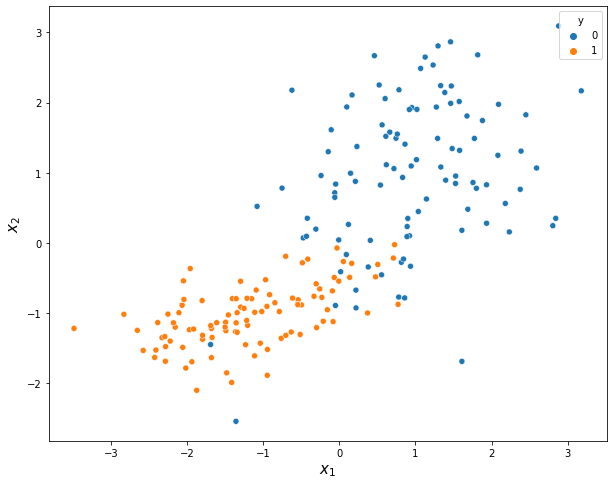

In [24]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
sns.scatterplot(x='x1', y='x2', data=df, hue='y')
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15);

Como apreciamos en el gráfico, el cuadrante superior derecho contiene mayoritariamente datos de la clase azul ($y=0$), mientras que el cuadrante inferior izquierdo corresponde mayoritariamente a la clase naranja ($y=1$). El ejercicio será entonces entrenar un modelo que aprenda a clasificar si se trata de un punto azul o naranja en base al valor de las _features_ ($x_1, x_2$).

Como siempre, antes de comenzar el entrenamiento, vamos a separar los datos en los conjuntos de _train_ y *test*:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], random_state=0)
print('Hay', y_train.shape[0], 'datos de entrenamiento y', y_test.shape[0], 'datos de testeo')

Hay 150 datos de entrenamiento y 50 datos de testeo


Hecha la separación entre _train_ y *test*, ya podemos entrenar nuestro primer KNN:

In [26]:
# Importamos la clase KNeighborsClassifier de módulo neighbors
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Instanciamos el modelo especificando el valor deseado de k con el argumento n_neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [28]:
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train);

En este paso, nuestro modelo se encargó de "memorizar" la ubicación de cada punto del _training set_. Cuando reciba un dato nuevo, simplemente lo ubicará en el espacio, indentificará los _k_=5 vecinos más cercanos a ese punto y le asignará la etiqueta correspondiente a la clase mayoritaria.

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/></div>
  <div style="float:left;width: 100%;"><label>Notemos que KNN no se encarga de estimar ningún parámetro (como los $\beta$ de la regresión lineal, por ejemplo). Otra diferencia con respecto a los modelos que hemos estudiado hasta ahora es que KNN requiere comparar cada dato de <i>test</i> contra <b>todos</b> los datos de <i>train</i> para poder detectar los vecinos más cercanos (lo cual lo hace un tanto costoso cuando estamos trabajando con datasets de gran tamaño). Por estos motivos, decimos que KNN pertence a la clase de modelos <b>no paramétricos basados en instancias</b>.
      </label>
    </div>

Podemos visualizar las "áreas de influencia" de cada clase, que delimitan lo que formalmente se conoce como **fronteras de decisión**: 

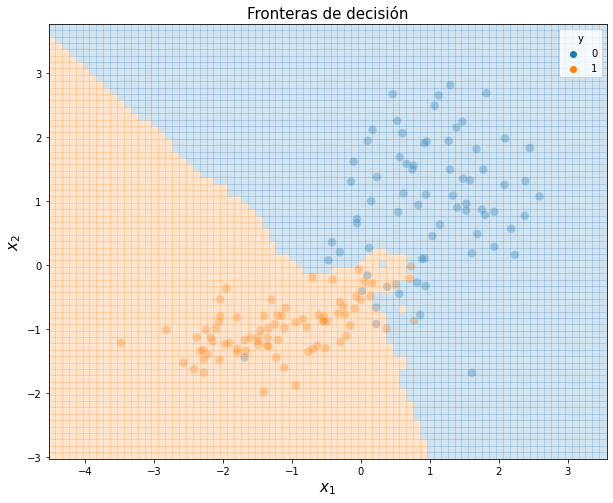

In [29]:
# Definimos el tamaño de la figura
plt.figure(figsize=(10,8))

# Visualizamos los datos de entrenamiento
sns.scatterplot(x=X_train['x1'], y=X_train['x2'], hue=y_train, alpha=0.3, s=75)

# Definimos una grilla de valores que abarcan todo el rango de cada variable
x1_min, x1_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
x2_min, x2_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, .1), np.arange(x2_min, x2_max, .1))

# Predecimos a partir de los valores de la grilla
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

# Representamos las áreas de influencia de cada clase
plt.pcolormesh(x1, x2, Z, cmap = ListedColormap(sns.color_palette(n_colors=2)), alpha=0.2, shading='auto')

# Definimos los rótulos del gráfico
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15)
plt.title('Fronteras de decisión', fontsize=15);

El área azul indica que cualquier punto que se ubique dentro de ella tendrá entre sus 5 vecinos más cercanos una mayoría de puntos azules ($y = 0$), mientras que el área naranja indica que los 5 vecinos más cercanos para cualquier punto dentro de ella serán mayoritariamente naranjas ($y = 1$).

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Con esta imagen en mente, pensemos:<br>
- ¿Qué etiqueta recibiría un dato nuevo ubicado en el punto $(x_1 = 2, x_2 = 0)$?<br>
- ¿Y el punto $(x_1 = -2, x_2 = 0)$?</b></label></div>
</div>

- Azul
- Naranja

¡Ya estamos listos para predecir datos nuevos!

In [30]:
# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test)

In [37]:
# Armamos una tabla con las predicciones, indicando si fueron acertadas o no
df_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index=y_test.index), y_test==y_pred], axis=1)
df_pred.columns = ['x1', 'x2', 'y', 'y_pred', 'pred_ok']
df_pred.sample(5)

,x1,x2,y,y_pred,pred_ok
33,0.211277,0.876169,0,0,True
18,-0.752106,0.779876,0,0,True
183,1.019101,1.901981,0,0,True
16,-1.018499,-0.979112,1,1,True
75,-0.008054,0.041570,0,0,True


Antes de evaluar nuestro modelo, podemos analizar gráficamente qué resultados obtuvimos. Vamos a representar los datos del _test set_ con un tamaño mayor y un color más intenso sobre el gráfico anterior, indicando con un círculo las clasificaciones correctas y con una cruz, las incorrectas.

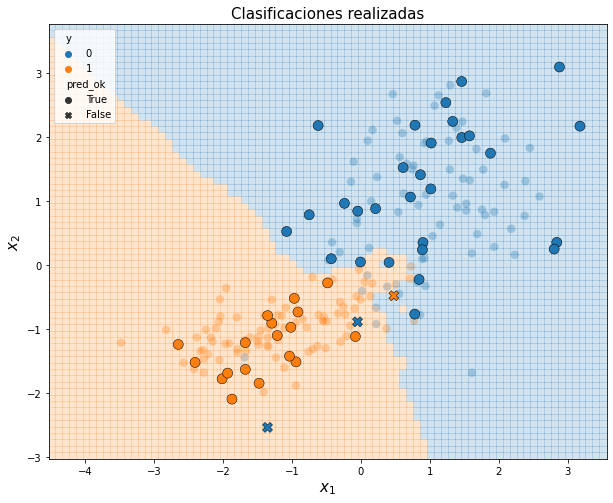

In [32]:
# Definimos el tamaño de la figura
plt.figure(figsize=(10,8))

# Visualizamos los datos de entrenamiento
sns.scatterplot(x=X_train['x1'], y=X_train['x2'], hue=y_train, alpha=0.3, s=75, legend=None)

# Definimos una grilla de valores que abarcan todo el rango de cada variable
x1_min, x1_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
x2_min, x2_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, .1), np.arange(x2_min, x2_max, .1))

# Predecimos a partir de los valores de la grilla
Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

# Representamos las áreas de influencia de cada clase
plt.pcolormesh(x1, x2, Z, cmap=ListedColormap(sns.color_palette(n_colors=2)), alpha=0.2, shading='auto')

# Visualizamos las predicciones hechas sobre el test set
sns.scatterplot(x='x1', y='x2', hue='y', edgecolor='k', linewidth=0.5,
                alpha=1, style='pred_ok', style_order=[True, False],
                data=df_pred, s=100)

# Definimos los rótulos del gráfico
plt.xlabel(f'$x_1$', fontsize=15)
plt.ylabel(f'$x_2$', fontsize=15)
plt.title('Clasificaciones realizadas', fontsize=15);

¡Nada mal! De 50 observaciones del conjunto de testeo, tan sólo 3 de ellas fueron erróneamente clasificadas. En términos porcentuales, esto significa que acertamos en el 94% de las clasificaciones.

In [33]:
# La serie 'pred_ok' indica con booleanos si la predicción fue correcta
# El promedio de esta serie nos indica la proporción de clasificación acertadas 
df_pred['pred_ok'].mean()

0.94

Por supuesto, existen métodos específicos provistos por Scikit-Learn que nos facilitan el cálculo de estas métricas de evaluación. Si queremos conocer la proporción de casos correctamente predichos, podemos utilizar la función `accuracy_score()` que importamos del módulo de métricas de Scikit-Learn:

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

Ahora bien, sabemos que la capacidad de generalización de un modelo depende de un buen ajuste a los datos de entrenamiento, sin incurrir en situaciones de sub-ajuste (sesgo) o sobre-ajuste (varianza). Con KNN, una forma de equilibrar el _trade-off_ entre sesgo y varianza es probar distintos valores del hiperparámetro _k_ hasta encontrar el adecuado. Observemos primero qué ocurre con las fronteras de decisión conforme varía el valor de _k_:

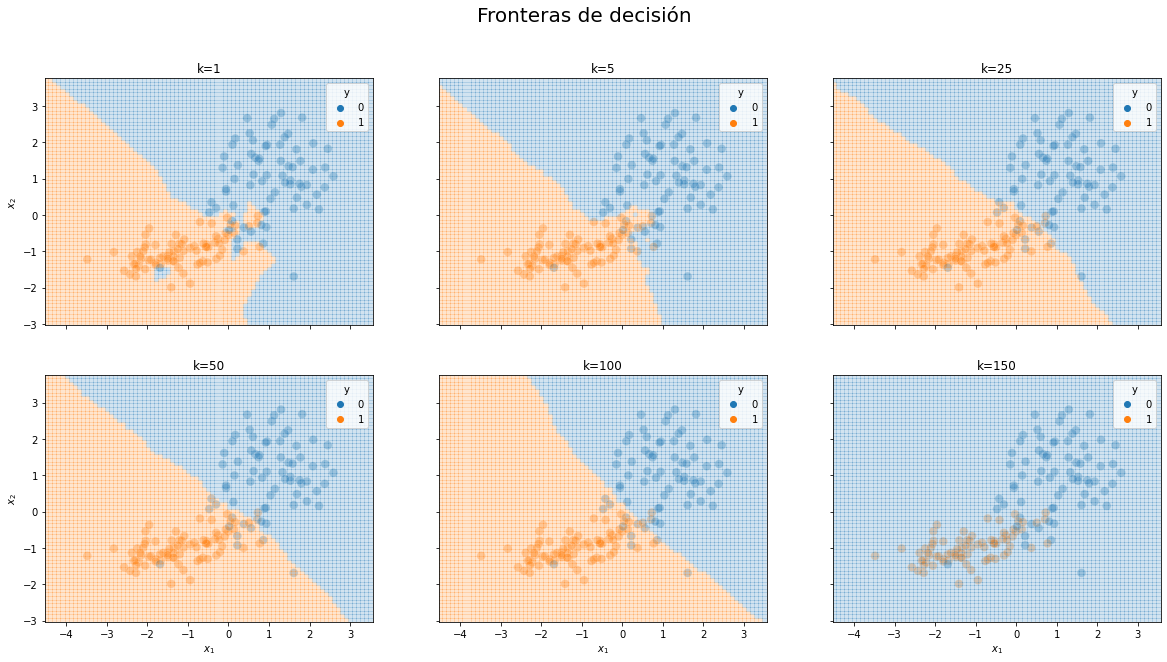

In [35]:
# Generamos una grilla de plots para representar las distintas fronteras de decisión
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharex=True, sharey=True)
ax = ax.ravel()
fig.suptitle('Fronteras de decisión', fontsize=20)

# Iteramos sobre distintos valores de k
for i, k in enumerate([1, 5, 25, 50, 100, 150]):
    # Visualizamos los datos de entrenamiento
    sns.scatterplot(x=X_train['x1'], y=X_train['x2'], hue=y_train, alpha=0.3, s=75, ax=ax[i])
    
    # Definimos una grilla de valores que abarcan todo el rango de cada variable
    x1_min, x1_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
    x2_min, x2_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, .1), np.arange(x2_min, x2_max, .1))

    # Instanciamos y entrenamos un KNN con n_neighbors=k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predecimos a partir de los valores de la grilla
    Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
    Z = Z.reshape(x1.shape)

    # Representamos las áreas de influencia de cada clase
    ax[i].pcolormesh(x1, x2, Z, cmap=ListedColormap(sns.color_palette(n_colors=2)), alpha=0.2, shading='auto')
    ax[i].set_title(f'k={k}')
    ax[i].set_xlabel(f'$x_1$')
    ax[i].set_ylabel(f'$x_2$')

Como podemos observar en estos gráficos, al cambiar el valor de _k_, se modifican las fronteras de decisión del modelo.

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br><br>
  <div style="float:left;width: 85%;"><label><b>¿Dónde se identifican situaciones de sub-ajuste y dónde de sobre-ajuste?</b></label></div>
</div>

- Para valores de K bajos, se genera un Overfitting, ya que copia exactamente el color del punto de entrenamiento que tome mas cercano.
- Para valores de K muy altos, se genera un Underfitting, ya que tiene mucho sesgo el modelo.

Para poder comprender qué ocurre con el dilema entre sesgo y varianza conforme varía _k_, conviene pensar en las situaciones extremas:

- De mínima, el valor de _k_ no puede ser inferior a 1, puesto que de ser igual a 0 no habría ningún vecino contra el que comparar a los datos nuevos (tampoco tendría mucho sentido hablar de identificar los -2 vecinos más cercanos, por ejemplo). Cuando _k_ vale 1, el modelo va a estar "pegándose" demasiado a cada punto del set de entrenamiento, lo que lleva a una pérdida considerable de generalidad. Las "islas" azules dentro del área naranja que se observan en la primera figura son una clara representación de esta situación. Por esto, **solemos asociar valores demasiado bajos de _k_ con una alta varianza del modelo**.
- De máxima, _k_ no puede ser mayor al número se _samples_ del conjunto de entrenamiento, ya que estaríamos pidiéndole al modelo que evalúe más puntos de los que conoce. Si _k_ = _n_, el modelo sólo aprende a predecir la clase mayoritaria en el _training set_, de ahí que en la última figura de la grilla observemos que el área azul cubre todo el gráfico. Por esto, **valores demasiado altos de _k_ suelen asociarse a un alto sesgo del modelo**.

**Hallar un valor adecuado de _k_ es un aspecto crucial al momento de trabajar con KNN. Para ello, será necesario trabajar con un esquema de _cross-validation_ que nos permita elegir un _k_ óptimo en base a múltiples pruebas**.

<a id="section_distances"></a>
## Medidas de distancia

Por lo que vimos hasta el momento, sabemos que KNN debe identificar las _k_ observaciones del _training set_ más parecidas o cercanas a cada muestra nueva para poder predecir una etiqueta asociada. Pero, ¿cómo definimos qué significa "estar cerca"? Un aspecto importante de esta cuestión es elegir una métrica de distancia que resulte apropiada.

Por defecto, KNN trabaja con la [**distancia euclídea**](https://es.wikipedia.org/wiki/Distancia_euclidiana), ya que funciona bien para la mayoría de los problemas. **En dos dimensiones, la distancia euclídea equivale al teorema de Pitágoras**. Para un espacio de _n_ dimensiones, la fórmula de la distancia euclídea entre un punto $P = (p_1, p_2, ..., p_n)$ y otro punto $Q = (q_1, q_2, ..., q_n)$ es:

$$ d_{(P, Q)} = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + ... (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

Si observamos los argumentos de la clase `KNeighborsClassifier`, encontraremos dos que especifican esta medida de distancia:

```python
KNeighborsClassifier(p=2, metric='minkowski')
```

En efecto, la distancia euclídea es un caso particular de la [**distancia de Minkowski**](https://en.wikipedia.org/wiki/Minkowski_distance), que para dos puntos $X = (x_1, x_2, ..., x_n)$ e $Y = (y_1, y_2, ..., y_n)$ se define como:

$$ D_{(X, Y)} = (\sum_{i=1}^{n} |x_i - y_i|^p)^{\frac{1}{p}} $$

Podemos apreciar que la distancia de Minkowski depende del parámetro _p_, cuyo valor define algunas métricas de distancia comúnmente utilizadas:

- Cuando _p_ = 1, la distancia de Minkowski adopta el nombre de [**geometría del taxista o distancia Manhattan**](https://es.wikipedia.org/wiki/Geometr%C3%ADa_del_taxista). El nombre se debe a que la distancia entre dos puntos se calcula como la suma de las diferencias absolutas de sus coordenadas, tal como la distancia que un taxi debe recorrer en una ciudad con un callejero cuadriculado.
- Cuando _p_ = 2, la distancia de Minkowski equivale a la distancia euclídea.

Esta ilustración muestra la diferencia entre la distancia euclídea (línea verde) y la distancia de Manhattan (líneas roja, azul y amarilla):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/800px-Manhattan_distance.svg.png" width="350">
<h5><center><a href="https://es.wikipedia.org/wiki/Geometr%C3%ADa_del_taxista">Fuente: Wikipedia<a></center></h5>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Si cada "cuadra" de este callejero cuadriculado tiene una longitud de 1:<br>
- ¿Qué línea es más larga, la roja, la azul o la amarilla?<br>
      - ¿Cuánto mide la línea verde?<br></b></label></div>
</div>

- Todas miden lo mismo
- 6 * ((2)**(1/2))=6

Ya que KNN trabaja computando distancias, **un paso importante del preprocesamiento de los datos consiste en estandarizar las variables, de forma tal de garantizar que las distintas escalas no afecten al cálculo de distancias**.

<a id="section_resumen"></a>
## En resumen

<br>
<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png"/> </div>
  <div style="float:left;width: 85%;"><label>Hemos tenido nuestro primer acercamiento a los problemas de clasificación, en los que buscamos predecir una variable categórica o cualitativa en lugar de cuantitativa (como en los problemas de regresión). Presentamos un algoritmo de clasificación de los más sencillos, <b>KNN</b>, que se encarga de predecir una etiqueta para una observación en particular a partir de la clase mayoritaria entre los <i>k</i> vecinos más cercanos. Generamos una intuición visual acerca de cómo varían las fronteras de decisión del algoritmo en función del hiperparámetro <i>k</i>, el cual resulta crucial para encontrar un equilibrio adecuado entre sesgo y varianza. También, hemos visto algunas de las métricas de distancia más comunes, como la <b>distancia euclídea</b> y la <b>distancia de Manhattan</b> (ambos casos particulares de la <b>distancia de Minkowski</b>).</label></div>
</div>

Si bien en esta notebook utilizamos datos sintéticos, esto fue sólo a los fines de la presentación del algoritmo. En la próxima notebook, trabajaremos sobre un dataset real para entrenar un **KNN** que aprenda a distinguier tumores benignos de malignos, un modelo que podría ser de mucha ayuda en medicina al momento de diagnosticar pacientes.